<a href="https://colab.research.google.com/github/escapingLife/mashinePrograming/blob/master/5%EC%A3%BC%EC%B0%A8/DL_BMI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [21]:

# -----------------------------
# 1) 데이터 준비
# -----------------------------
df = pd.read_csv("/content/drive/MyDrive/diabetes.csv")

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [23]:
# 입력(X), 출력(y) 분리
X = df.drop(columns=["BMI"])
y = df["BMI"]

In [34]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [33]:
# 2. 정규화
# 데이터 전처리(스케일링) 도구 중 하나,특징(feature) 값들을 평균 0, 표준편차 1로 변환
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
# 3. 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

In [27]:
# 4. DL 모델 정의 (MLP)
model = Sequential()
model.add(Dense(128, input_shape=(8,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # 회귀니까 출력 뉴런은 1개

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
# 5. 모델 컴파일
model.compile(
    optimizer='adam',
    loss='mse',     # 평균제곱오차
    metrics=['mae'] # 평균절대오차
)

In [30]:
# 6. 학습
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    verbose=1
)

Epoch 1/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 1048.2535 - mae: 31.5769 - val_loss: 959.0361 - val_mae: 29.9552
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 901.6213 - mae: 29.1935 - val_loss: 640.5670 - val_mae: 24.3851
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 533.8237 - mae: 21.7664 - val_loss: 179.5803 - val_mae: 11.5152
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 135.9174 - mae: 9.3214 - val_loss: 116.1443 - val_mae: 7.5895
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 109.7504 - mae: 7.4038 - val_loss: 87.4802 - val_mae: 6.9148
Epoch 6/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 77.2382 - mae: 6.5928 - val_loss: 80.7797 - val_mae: 6.4911
Epoch 7/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 65.9451 - mae: 6.1092 - val_loss: 79.5600 - val_mae: 6.3764
Epoch 8/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 63.5982 - mae: 5.8387 - val_loss: 76.5176 - val_mae: 6.2636
Epoch 9/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0

In [31]:
# 7. 평가
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"DL 모델 테스트 MAE: {mae:.4f}")  #  MAE 확인

DL 모델 테스트 MAE: 5.3810


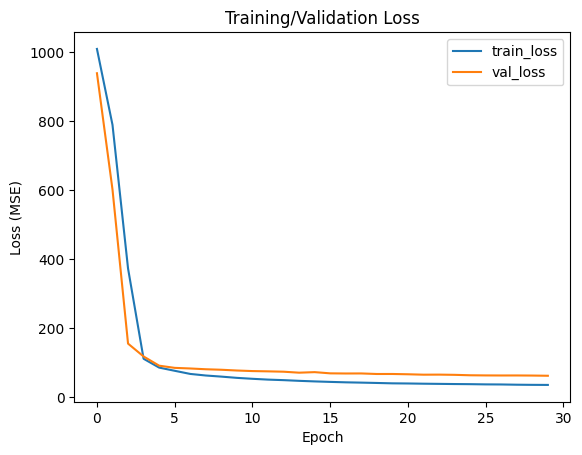

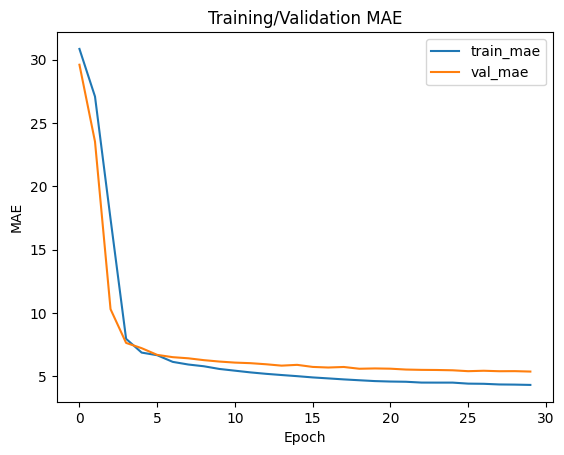

In [20]:
# 8 손실(loss) 시각화
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.title("Training/Validation Loss")
plt.show()

# MAE 시각화
plt.plot(history.history['mae'], label='train_mae')
plt.plot(history.history['val_mae'], label='val_mae')
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.legend()
plt.title("Training/Validation MAE")
plt.show()